In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv('preprocessed_flooding.csv')

In [3]:
print(df.columns)
all_columns = list(range(len(df.columns)))

Index(['Unnamed: 0', 'time', 'length', 'info', 'transmission_rate_per_1000_ms',
       'reception_rate_per_1000_ms', 'transmission_average_per_sec',
       'reception_average_per_sec', 'transmission_count_per_sec',
       'reception_count_per_sec', 'transmission_total_duration_per_sec',
       'reception_total_duration_per_sec', 'dao', 'dis', 'dio', 'label'],
      dtype='object')


In [4]:
exclude_columns_indices = [0,2,3,8,9,15]

In [5]:
filtered_columns = df.iloc[:, [col for col in all_columns if col not in exclude_columns_indices]]

In [6]:
X_train_test, X_test, y_train_test, y_test = train_test_split(filtered_columns, df.label, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25)

# Logistic Regression

In [7]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)

# Model evaluation
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Validation Set Accuracy:", accuracy)

Validation Set Accuracy: 0.9714459372190496


In [8]:
# Logstic Regression with L1 regularization
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
lasso_logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_logreg.predict(X_val)

# Model evaluation
accuracy = accuracy_score(y_val, y_pred)
print("Model Validation Accuracy:", accuracy)

Model Validation Accuracy: 0.9700530561077837


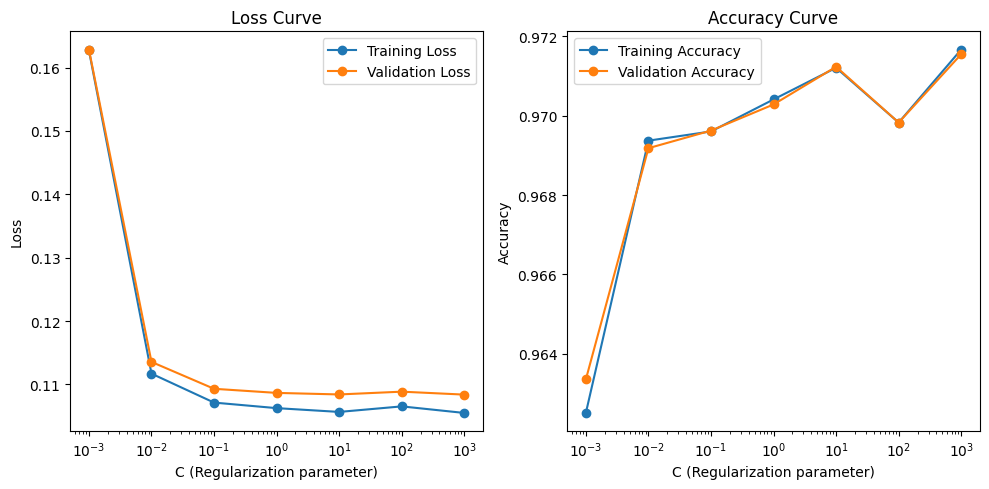

In [9]:

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Different values of C (regularization parameter)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for C in C_values:
    # Create Logistic Regression model with L1 penalty and different C values
    lasso_logreg = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=10000)
    lasso_logreg.fit(X_train, y_train)

    # Calculate loss and accuracy for training set
    y_pred_train_probs = lasso_logreg.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred_train_probs)
    train_losses.append(train_loss)

    y_pred_train = lasso_logreg.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)

    # Calculate loss and accuracy for validation set
    y_pred_val_probs = lasso_logreg.predict_proba(X_val)
    val_loss = log_loss(y_val, y_pred_val_probs)
    val_losses.append(val_loss)

    y_pred_val = lasso_logreg.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_accuracies.append(val_accuracy)

# Plot the curves
plt.figure(figsize=(10, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(C_values, train_losses, label='Training Loss', marker='o')
plt.plot(C_values, val_losses, label='Validation Loss', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Create a logistic regression model with L2 (Ridge) regularization
ridge_logreg = LogisticRegression(penalty='l2', max_iter=1000)

# Fit the model using the training data
ridge_logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_logreg.predict(X_val)

# Model evaluation
accuracy = accuracy_score(y_val, y_pred)
print("Model Validation Accuracy:", accuracy)

Model Validation Accuracy: 0.9714459372190496


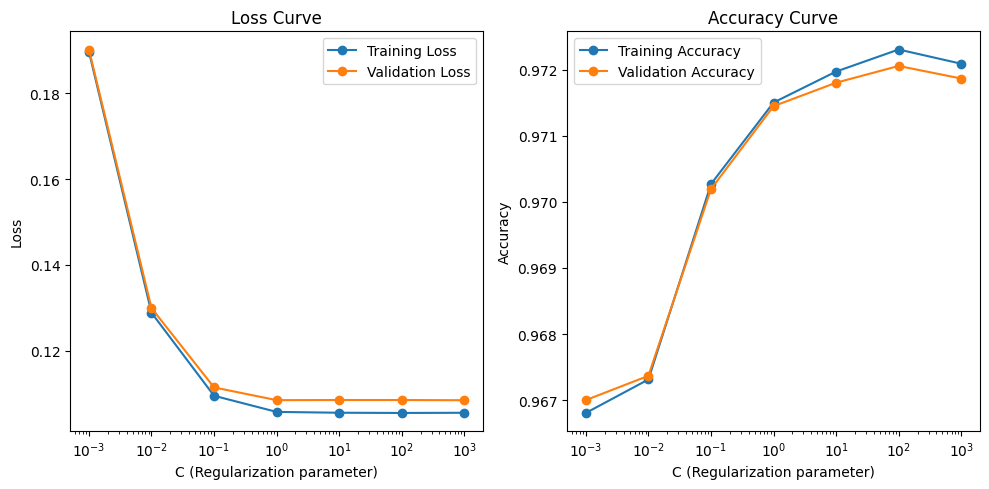

In [11]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for C in C_values:
    # Create Logistic Regression model with L2 penalty and different C values
    ridge_logreg = LogisticRegression(penalty='l2', C=C, max_iter=1000)
    ridge_logreg.fit(X_train, y_train)

    # Calculate loss and accuracy for training set
    y_pred_train_probs = ridge_logreg.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred_train_probs)
    train_losses.append(train_loss)

    y_pred_train = ridge_logreg.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)

    # Calculate loss and accuracy for validation set
    y_pred_val_probs = ridge_logreg.predict_proba(X_val)
    val_loss = log_loss(y_val, y_pred_val_probs)
    val_losses.append(val_loss)

    y_pred_val = ridge_logreg.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_accuracies.append(val_accuracy)

# Plot the curves
plt.figure(figsize=(10, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(C_values, train_losses, label='Training Loss', marker='o')
plt.plot(C_values, val_losses, label='Validation Loss', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
y_pred_test = logreg.predict(X_test)
accuracy_holdout = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", accuracy_holdout)

print(metrics.classification_report(y_test, y_pred_test))

Test set accuracy: 0.9716612006635179
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     39372
           1       0.95      1.00      0.97     39601

    accuracy                           0.97     78973
   macro avg       0.97      0.97      0.97     78973
weighted avg       0.97      0.97      0.97     78973



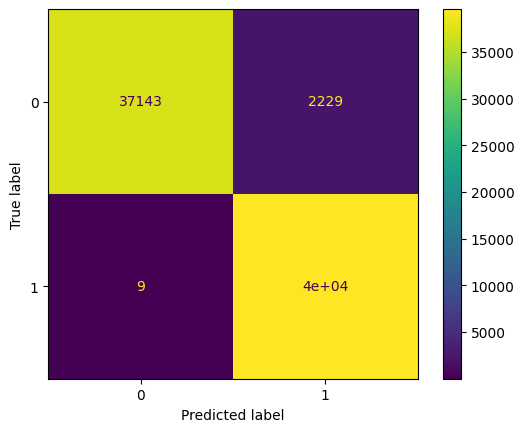

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Decision Trees Model

In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_val)


# Model Accuracy
print("Validation Set Accuracy:",metrics.accuracy_score(y_val, y_pred))

Validation Set Accuracy: 0.9921112278880123


/var/folders/6t/n15n56yj72x3s3n9qpvjb1c80000gn/T/ipykernel_98242/4036146074.py:10: RuntimeWarning: divide by zero encountered in log
  train_loss = -np.mean(y_train * np.log(clf.predict_proba(X_train)[:, 1]))
/var/folders/6t/n15n56yj72x3s3n9qpvjb1c80000gn/T/ipykernel_98242/4036146074.py:11: RuntimeWarning: divide by zero encountered in log
  val_loss = -np.mean(y_val * np.log(clf.predict_proba(X_val)[:, 1]))
/var/folders/6t/n15n56yj72x3s3n9qpvjb1c80000gn/T/ipykernel_98242/4036146074.py:10: RuntimeWarning: divide by zero encountered in log
  train_loss = -np.mean(y_train * np.log(clf.predict_proba(X_train)[:, 1]))
/var/folders/6t/n15n56yj72x3s3n9qpvjb1c80000gn/T/ipykernel_98242/4036146074.py:11: RuntimeWarning: divide by zero encountered in log
  val_loss = -np.mean(y_val * np.log(clf.predict_proba(X_val)[:, 1]))
/var/folders/6t/n15n56yj72x3s3n9qpvjb1c80000gn/T/ipykernel_98242/4036146074.py:10: RuntimeWarning: divide by zero encountered in log
  train_loss = -np.mean(y_train * np.log(cl

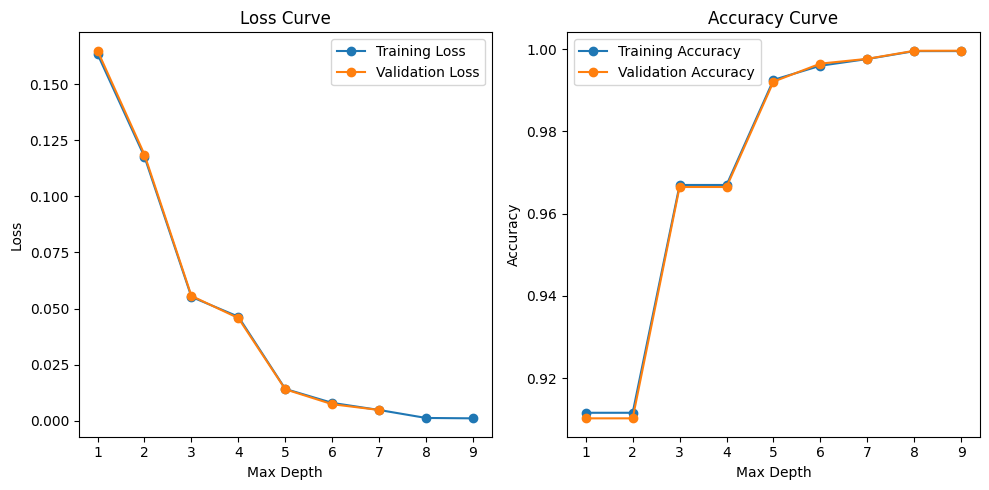

In [66]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for i in range(1, 10):
    clf.set_params(max_depth=i)
    clf.fit(X_train, y_train)

    # Calculate training and validation losses
    train_loss = -np.mean(y_train * np.log(clf.predict_proba(X_train)[:, 1]))
    val_loss = -np.mean(y_val * np.log(clf.predict_proba(X_val)[:, 1]))

    # Calculate training and validation accuracies
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    val_accuracy = accuracy_score(y_val, clf.predict(X_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Create a range of values for x-axis
x_values = list(range(1, 10))

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values, train_losses, label='Training Loss', marker='o')
plt.plot(x_values, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(x_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(x_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
y_pred_test = clf.predict(X_test)
accuracy_holdout = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", accuracy_holdout)

print(metrics.classification_report(y_test, y_pred_test))

Test set accuracy: 0.9994555101110506
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39372
           1       1.00      1.00      1.00     39601

    accuracy                           1.00     78973
   macro avg       1.00      1.00      1.00     78973
weighted avg       1.00      1.00      1.00     78973



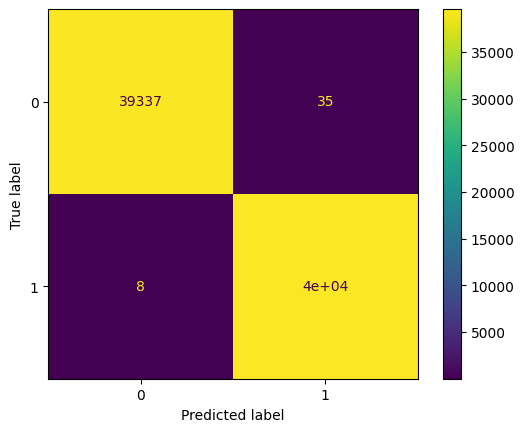

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

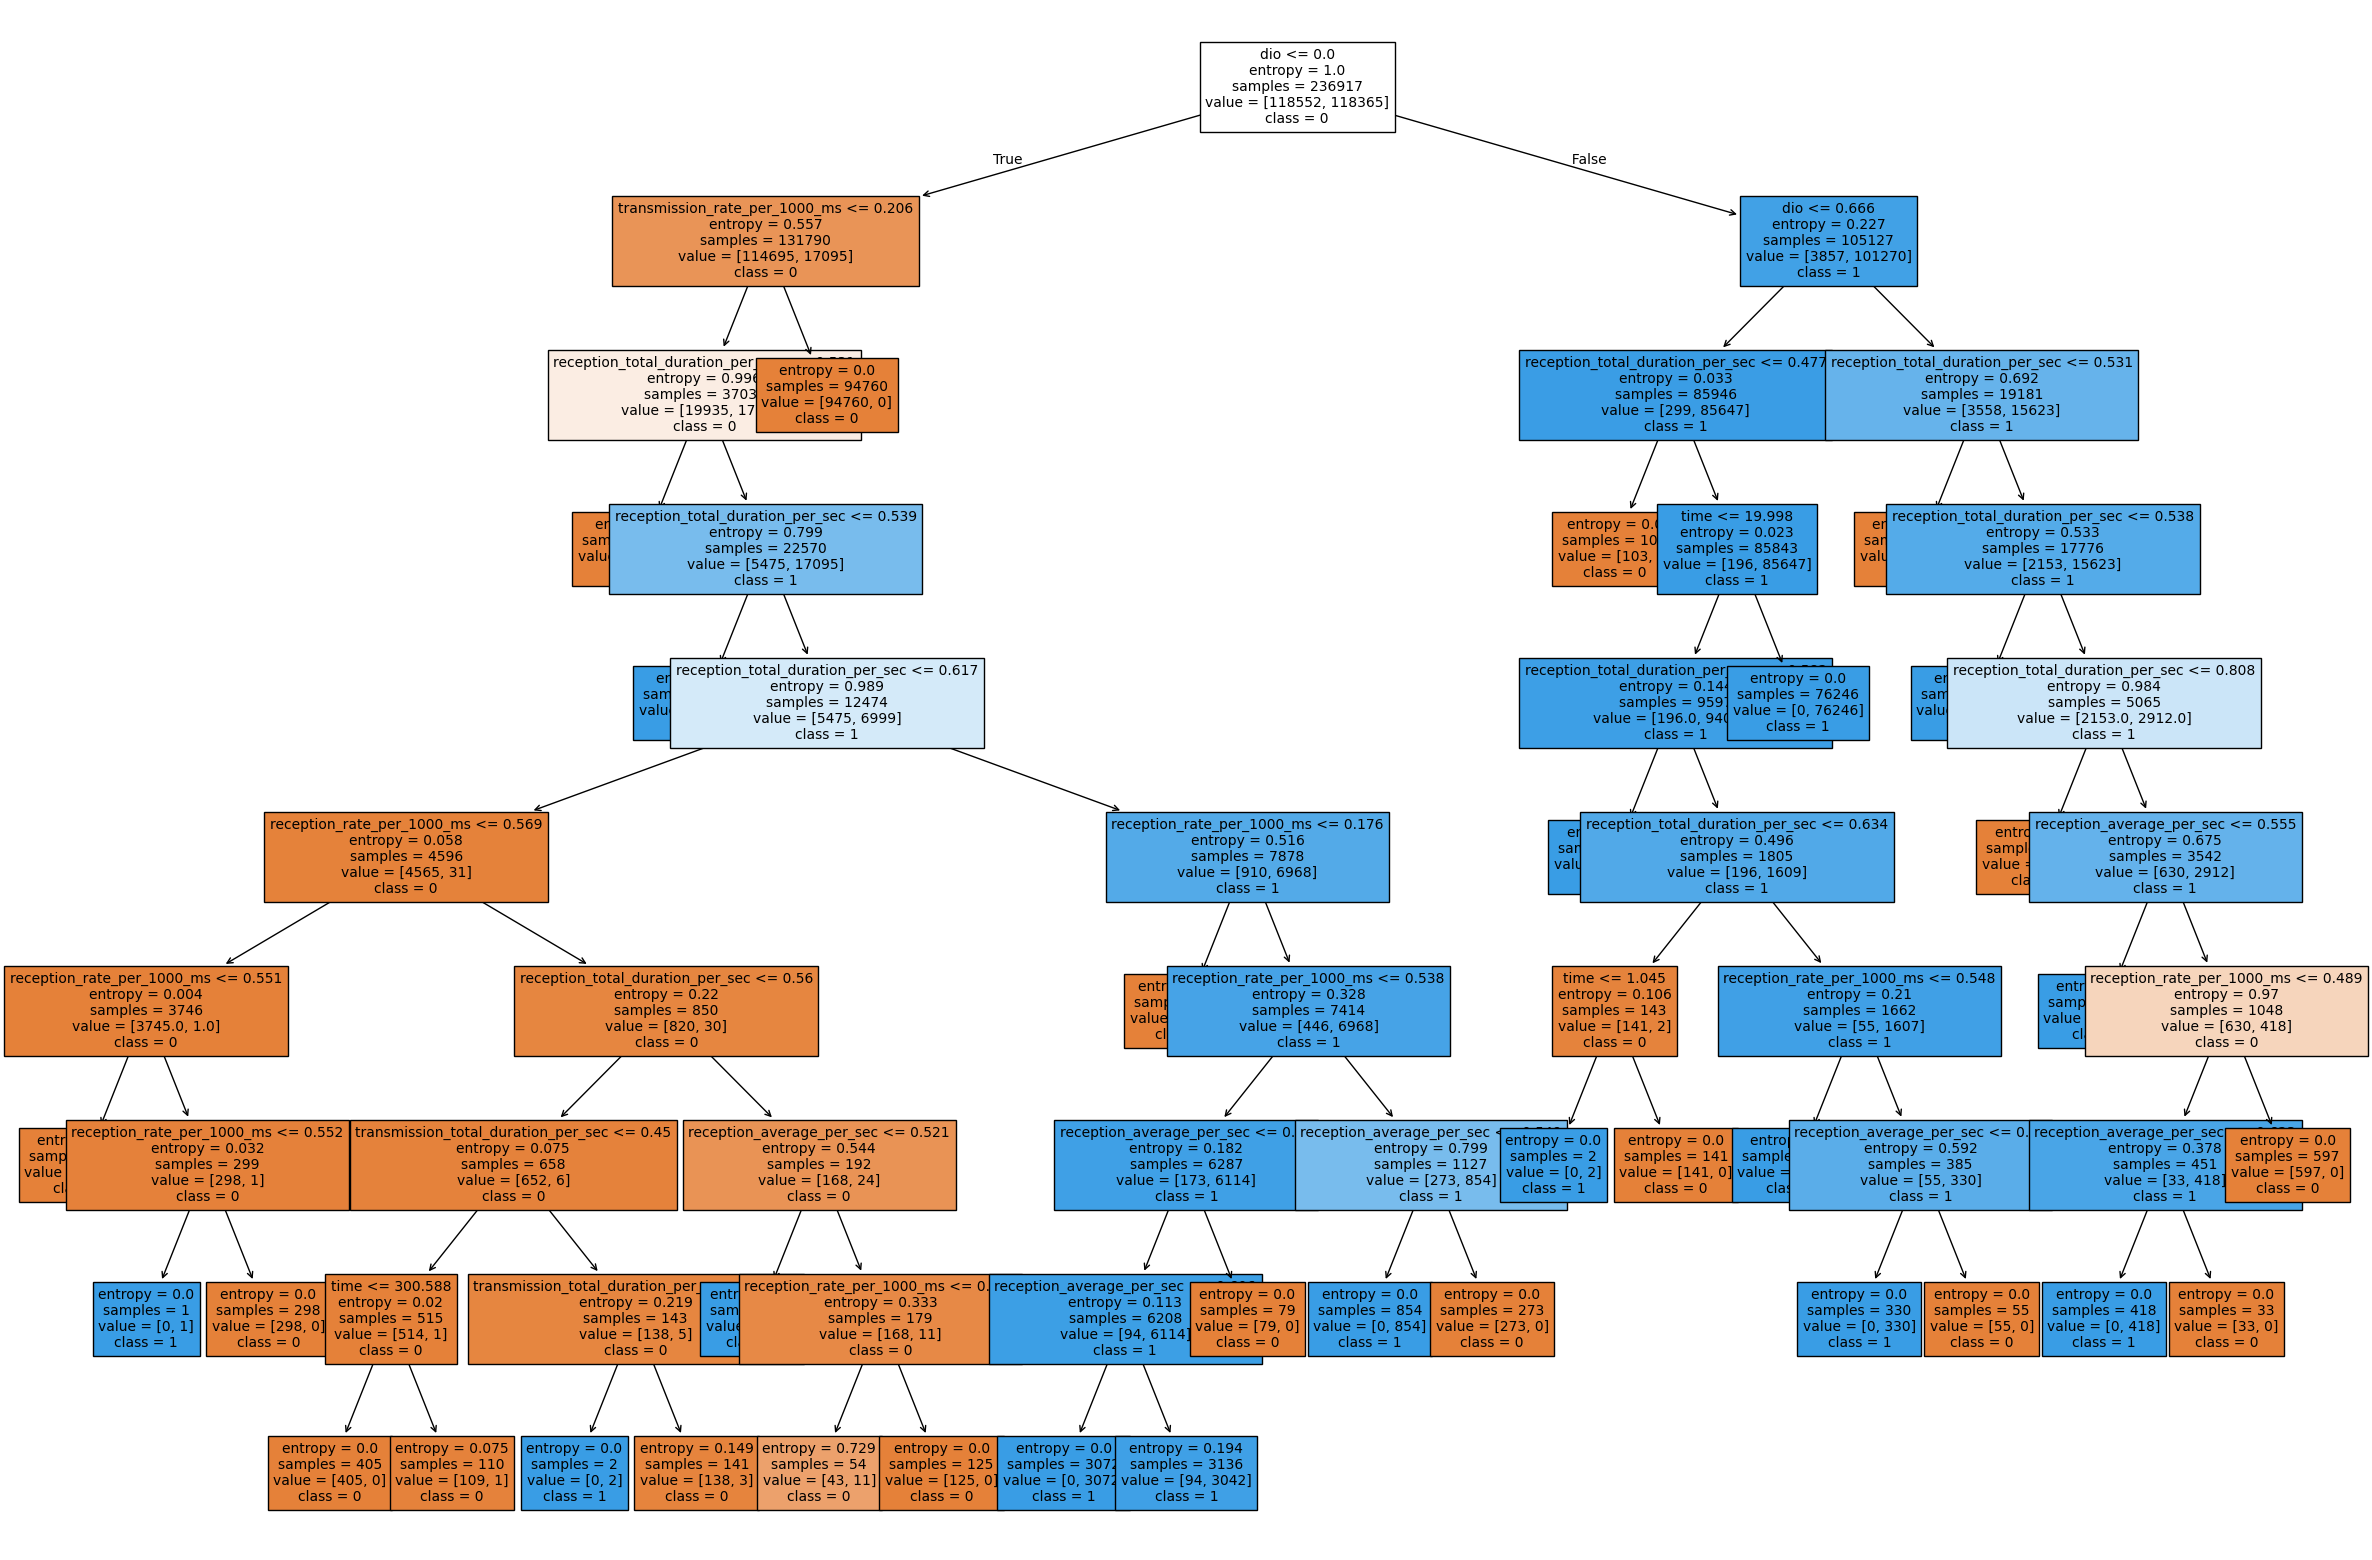

In [71]:
plt.figure(figsize=(30,20)) 
plot_tree(clf, feature_names=filtered_columns.columns, class_names=['0','1'], filled=True, fontsize=10)
plt.show()

# K-Nearest Neighbors

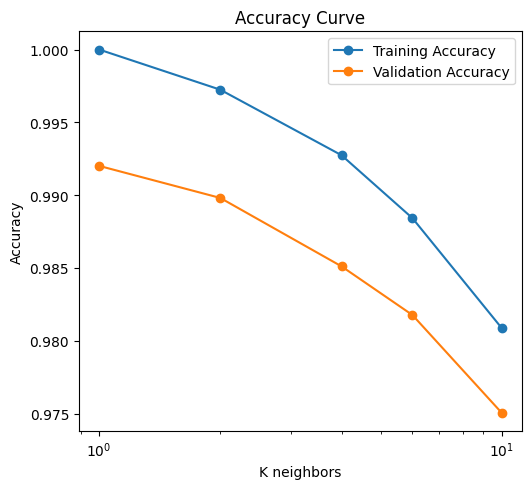

In [18]:
k_values = [1,2,4,6,10]  # Different values of K for the neighbors

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for k in k_values:
    # Create K-NN models with different values of K and pick the best one
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate loss and accuracy for training set
    y_pred_train_probs = knn.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred_train_probs)
    train_losses.append(train_loss)

    y_pred_train = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)

    y_pred_val = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_accuracies.append(val_accuracy)

# Plot the curves
plt.figure(figsize=(10, 5))


# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
best_k = k_values[np.argmax(val_accuracies)]  # Choose the K with the max accuracy
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_pred_test = best_knn.predict(X_test)
accuracy_holdout = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", accuracy_holdout)

print(metrics.classification_report(y_test, y_pred_test))

Test set accuracy: 0.9928203309992023
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     39372
           1       0.99      0.99      0.99     39601

    accuracy                           0.99     78973
   macro avg       0.99      0.99      0.99     78973
weighted avg       0.99      0.99      0.99     78973



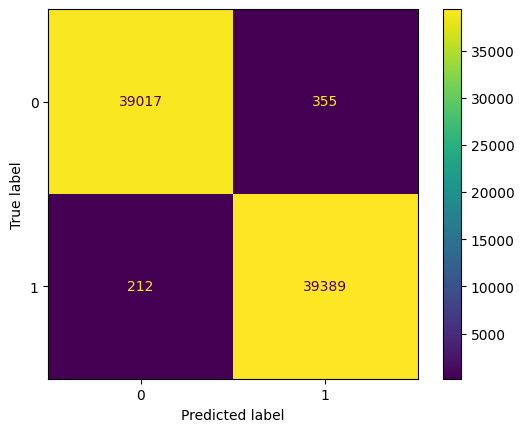

In [20]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# K-Means

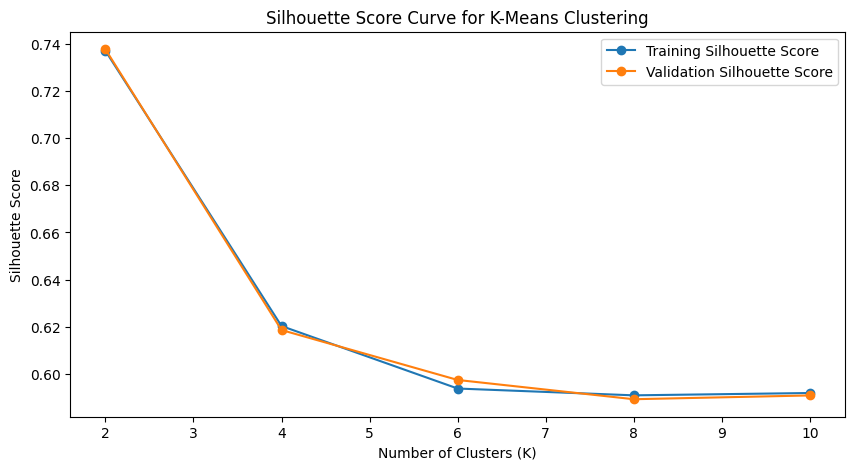

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming X_train and X_val are your feature matrices
k_values = [2, 4, 6, 8, 10]  # Different values of K for the clusters

train_silhouette_scores = []
val_silhouette_scores = []

for k in k_values:
    # Create K-Means models with different values of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)

    # Predict cluster labels
    train_labels = kmeans.predict(X_train)
    val_labels = kmeans.predict(X_val)

    # Calculate silhouette score for training set
    train_silhouette = silhouette_score(X_train, train_labels)
    train_silhouette_scores.append(train_silhouette)

    # Calculate silhouette score for validation set
    val_silhouette = silhouette_score(X_val, val_labels)
    val_silhouette_scores.append(val_silhouette)

# Plot the curves
plt.figure(figsize=(10, 5))

# Plot silhouette score curves
plt.plot(k_values, train_silhouette_scores, label='Training Silhouette Score', marker='o')
plt.plot(k_values, val_silhouette_scores, label='Validation Silhouette Score', marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Curve for K-Means Clustering')
plt.legend()
plt.show()


In [24]:
accuracy_holdout = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", accuracy_holdout)

print(metrics.classification_report(y_test, y_pred_test))

Test set accuracy: 0.9928203309992023
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     39372
           1       0.99      0.99      0.99     39601

    accuracy                           0.99     78973
   macro avg       0.99      0.99      0.99     78973
weighted avg       0.99      0.99      0.99     78973



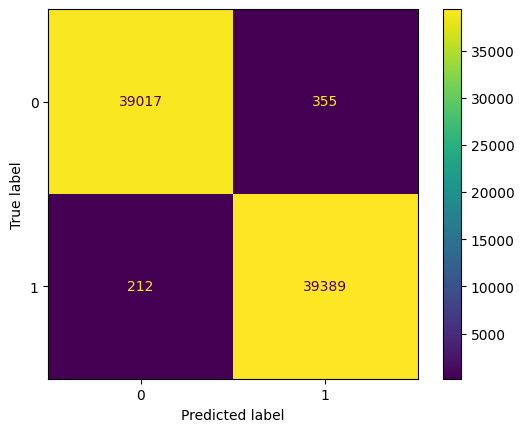

In [25]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()